### Colombia Housing Properties Price

In [1]:
# Read csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read the CSV file into a pandas dataframe
df = pd.read_csv('C:/Users/wdmoreno/OneDrive - Asesoftware S.A.S/Documentos/co_properties.csv')


In [2]:
# Get an overview of the dataset
# Print the number of rows and columns in the dataframe
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')
df.head(100)

The dataframe has 1000000 rows and 25 columns


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,xSBCXvGR3P8MzTuIidMoiQ==,Propiedad,2020-10-07,2021-04-20,2020-10-07,4.881305,-74.031179,Colombia,Cundinamarca,Chía,...,NaN,NaN,NaN,1.900000e+09,COP,NaN,Oportunidad! venta casa tipo R en Hacienda fon...,Totalmente independiente esta linda casa tiene...,Casa,Venta
96,13vLtL9CmuJ/7yTp+Rg6nw==,Propiedad,2020-10-07,2021-06-09,2020-10-07,4.932860,-73.976100,Colombia,Cundinamarca,Sopó,...,NaN,NaN,NaN,3.100000e+09,COP,NaN,Exclusiva casa en Aposentos para venta o arriendo,Esta hermosa casa está ubicada en el exclusivo...,Casa,Venta
97,aOaF/nr7rrwy8I2Up2VlRA==,Propiedad,2020-10-07,2020-10-08,2020-10-07,4.085000,-76.204000,Colombia,Valle del Cauca,Tuluá,...,NaN,NaN,NaN,1.200000e+08,COP,NaN,Casalote En Venta En Tulua Popular CodVBINP22162,"Excelente oportunidad para inversión, casa lot...",Casa,Venta
98,AX0jCAIESaUYEWUdf1wa/w==,Propiedad,2020-10-07,2020-10-08,2020-10-07,4.093000,-76.194000,Colombia,Valle del Cauca,Tuluá,...,NaN,NaN,NaN,1.950000e+08,COP,NaN,Casalote En Venta En Tulua Barrio Popular CodV...,"Excelente oportunidad para inversión, casa lot...",Casa,Venta


In [3]:
df_location=df[["l1","l2","l3","l4","l5","l6"]]
df_location.head(100)

,l1,l2,l3,l4,l5,l6
0,Colombia,Valle del Cauca,NaN,NaN,NaN,NaN
1,Colombia,Valle del Cauca,Cali,Ciudad Jardín,NaN,NaN
2,Colombia,Valle del Cauca,Cali,Ciudad Jardín,NaN,NaN
3,Colombia,Valle del Cauca,Cali,Ciudad Jardín,NaN,NaN
4,Colombia,Valle del Cauca,Cali,NaN,NaN,NaN
...,...,...,...,...,...,...
95,Colombia,Cundinamarca,Chía,NaN,NaN,NaN
96,Colombia,Cundinamarca,Sopó,NaN,NaN,NaN
97,Colombia,Valle del Cauca,Tuluá,NaN,NaN,NaN
98,Colombia,Valle del Cauca,Tuluá,NaN,NaN,NaN


In [4]:
unique_l1 = df_location["l1"].unique()
print(unique_l1)

['Colombia' 'Estados Unidos']


In [5]:
unique_l2 = df_location["l2"].unique()
print(unique_l2)

['Valle del Cauca' 'Cundinamarca' 'Risaralda' 'Caldas' 'Antioquia'
 'Magdalena' 'Meta' 'Quindío' 'Norte de Santander' 'Tolima' 'Bolívar'
 'Huila' 'Santander' 'Atlántico' 'Cauca' 'Cesar' 'Nariño' 'Córdoba'
 'Boyacá' 'Sucre' 'Casanare' 'Chocó' 'Vichada' 'Arauca' 'Guainía'
 'Caquetá' 'La Guajira' 'Amazonas'
 'San Andrés Providencia y Santa Catalina' 'Guaviare' 'Putumayo' 'Florida']


In [6]:
unique_l3 = df_location["l3"].unique()
print(unique_l3)

[nan 'Cali' 'Chía' 'Dagua' 'Pereira' 'Jamundí' 'Restrepo' 'Manizales'
 'Medellín' 'Bogotá D.C' 'Santa Marta' 'Villavicencio' 'Bello' 'Sopó'
 'Tuluá' 'Zarzal' 'Palmira' 'Envigado' 'Cartagena' 'Copacabana'
 'La Estrella' 'Neiva' 'Cartago' 'Ibagué' 'Rionegro' 'Bucaramanga'
 'Barranquilla' 'Floridablanca' 'Palmar de Varela' 'Itagui' 'Rivera'
 'Soacha' 'Armenia' 'Barbosa' 'Cúcuta' 'La Ceja' 'Socorro' 'Girardot'
 'Popayán' 'Riofrío' 'Palestina' 'Valledupar' 'Zipaquirá' 'Piedecuesta'
 'Villamaría' 'Girón' 'Cajicá' 'Mariquita' 'Fusagasugá' 'Duitama'
 'El Peñón' 'Puerto Colombia' 'Sabaneta' 'Yotoco' 'Calima' 'Sasaima'
 'Tubará' 'Filandia' 'Guatapé' 'Tocancipá' 'Sabanagrande' 'San Jerónimo'
 'Santa Rosa de Cabal' 'Tunja' 'Galapa' 'San Onofre' 'La Cumbre'
 'Candelaria' 'Sabanalarga' 'Puerto Parra' 'Yopal' 'Ipiales' 'Neira'
 'Yumbo' 'Villa de Leyva' 'La Mesa' 'Mosquera' 'Funza' 'Albania' 'Guasca'
 'Granada' 'Marinilla' 'San Francisco' 'Santa Rita' 'Cota' 'Soledad'
 'Santa Rosa' 'Curití' 'Génova' '

In [7]:
unique_l4 = df_location["l4"].unique()
print(unique_l4)

[nan 'Ciudad Jardín' 'San Fernando Nuevo' 'Laureles' 'Zona Noroccidental'
 'Zona Occidental' 'Zona Chapinero' 'Caney' 'Lili' 'Doce de Octubre'
 'La América' 'Belén' 'El Poblado' 'Villa Hermosa' 'Zona Norte'
 'Zona Suroccidental' 'Zona Sur' 'Zona Centro' 'Robledo' 'Castilla'
 'San Javier' 'San Cristóbal' 'La Flora' 'El Ingenio' 'Santa Mónica'
 'Pance' 'Santa Cruz' 'Santa Elena' 'Guayabal' 'Aranjuez'
 'San Fernando Viejo' 'Candelaria' 'Altavista' 'Manrique' 'El Limonar'
 'Buenos Aires' 'Popular' 'El Prado' 'Alarcón' 'Mejoras Públicas'
 'San Alonso' 'El Recreo' 'Nuevo Horizonte' 'Paseo de la Castellana'
 'Santa Isabel' 'Ríomar' 'San Antonio de Prado' 'San Mateo'
 'Antonia Santos' 'Olaya' 'Carrizal' 'Palmitas' 'San Felipe'
 'Metropolitana' 'Las Palmas' 'Nueva Granada' 'Puerto Colombia'
 'Campo Alegre' 'Norte-Centro Histórico' 'Navas' 'Bellavista'
 'Suroccidente' 'Suroriente' 'Galapa' 'Soledad']


In [8]:
unique_l5 = df_location["l5"].unique()
print(unique_l5)

[nan 'Suba' 'Engativa' 'Teusaquillo' 'Usaquén' 'Kennedy' 'Tunjuelito'
 'Fontibón' 'Los Mártires' 'Bosa' 'Puente Aranda' 'Chapinero' 'Santa Fe'
 'Rafael Uribe Uribe' 'Barrios Unidos' 'San Cristobal' 'Usme'
 'Antonio Nariño' 'Ciudad Bolívar' 'La Candelaria' 'Sumapaz']


In [9]:
unique_l6 = df_location["l6"].unique()
print(unique_l6)

[nan 'Cofradía' 'La Merced' 'Modelia' 'El Batán' 'Santa Barbara'
 'Villas De Granada' 'Cedritos' 'Bosque De Pinos' 'El Refugio'
 'Chico Reservado' 'Ricaurte' 'Colina Campestre' 'Santa Paula' 'Venecia'
 'Bella Suiza' 'Los Rosales' 'San Patricio' 'Nicolas De Federman'
 'Santa Teresa' 'Chapinero Alto' 'Chapinero Central' 'Hayuelos'
 'El Progreso' 'Las Orquideas' 'Barrancas' 'Chico Navarra' 'Chico Norte'
 'Ciudad Salitre' 'Alhambra' 'Sotavento' 'Castilla' 'La Granja'
 'Villa Alsacia' 'Quinta Paredes' 'Prado Veraniego' 'Galerias' 'Restrepo'
 'Madelena' 'Quinta Camacho' 'Marly' 'El Chicó' 'La Salle' 'El Castillo'
 'El Retiro' 'Palermo' 'Florida Blanca' 'Puente Largo' 'Gratamira'
 'Centro Internacional' 'Normandia' 'Pasadena ' 'Patio Bonito' 'Mazuren'
 'Molinos' 'El Contador' 'La Calleja' 'Santa Ana' 'Las Nieves' 'Las Aguas'
 'Veraguas' 'La Soledad ' 'Pontevedra ' 'Los Lagartos' 'Las Delicias'
 'Las Cruces' 'El Virrey' 'Las Ferias' 'Niza' 'Tintala'
 'Parque Central Bavaria' 'Las Villas' 'Tech

### Data cleaning

In [10]:
missing_values = df.isnull().sum()
percent_missing = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values('Percent', ascending=False)
print(missing_data[:30])

                  Total  Percent
surface_total    958758  95.8758
l6               945253  94.5253
surface_covered  940091  94.0091
price_period     878833  87.8833
l5               840873  84.0873
rooms            827913  82.7913
l4               726005  72.6005
bedrooms         623954  62.3954
lat              259719  25.9719
lon              259718  25.9718
bathrooms        200507  20.0507
l3                62812   6.2812
description         644   0.0644
currency            550   0.0550
price               509   0.0509
title                12   0.0012
property_type         0   0.0000
id                    0   0.0000
ad_type               0   0.0000
l2                    0   0.0000
l1                    0   0.0000
created_on            0   0.0000
end_date              0   0.0000
start_date            0   0.0000
operation_type        0   0.0000


In [11]:
df1=df.drop(['surface_total','surface_covered','price_period','rooms','bedrooms','lat','lon','bathrooms','id'], axis=1)

print("After delete columns >20% missing values and id without l4,l5 and l6\n")
print("Numbers of rows: ", df1.shape[0])
print("Numbers of columns: ", df1.shape[1])


After delete columns >20% missing values and id without l4,l5 and l6

Numbers of rows:  1000000
Numbers of columns:  16


In [12]:
# Función para verificar y asignar "No aplica" a las columnas l4, l5, l6
def verificar_nulos_no_bogota(row):
    if pd.isna(row["l4"]):
        row["l4"] = "No aplica"
    if pd.isna(row["l5"]):
        row["l5"] = "No aplica"
    if pd.isna(row["l6"]):
        row["l6"] = "No aplica"
    
    return row

# Aplicar la función verificar_nulos_no_bogota a cada fila del DataFrame
df1 = df1.apply(verificar_nulos_no_bogota, axis=1)


In [13]:
# Eliminamos todas las filas con valores nulos
df2 = df1.dropna(how='any')

print("\nAfter delete all empty rows\n")
print("Numbers of rows: ", df2.shape[0])
print("Numbers of columns: ", df2.shape[1])

print("\nPorcentage reduction data\n")
reduction_rows = 100*(1-(df2.shape[0]/df.shape[0]))
reduction_columns = 100*(1-(df2.shape[1]/df.shape[1]))

print("Reduction of rows: ", round(reduction_rows, 5))
print("Reduction of columns: ", round(reduction_columns, 5))



After delete all empty rows

Numbers of rows:  936254
Numbers of columns:  16

Porcentage reduction data

Reduction of rows:  6.3746
Reduction of columns:  36.0


### Data Analysis after cleaning

In [23]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Create feature matrix X and label y

X = df2.drop('price', axis=1)
X_colombia = df2[df2['l1'] == 'Colombia']
X = X[X['l1'] == 'Colombia']

# Convert categorical variables to dummies

# Frequency encode categorical variables
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
for col in cat_cols:
    freq_encoding = X[col].value_counts(normalize=True)
    X[col] = X[col].map(freq_encoding)


y = X_colombia['price']


price_min = y.min()
price_max = y.max()

print(price_min)
print(price_max)

# Definir el número de clases
n_classes = 4

# Discretizar la variable y en 10 clases
y, bins = pd.qcut(y, n_classes, labels=False, retbins=True)

print(y)
print(bins)



0.0
1600000000000.0
1         3
2         3
3         3
4         3
5         3
         ..
999995    0
999996    0
999997    0
999998    3
999999    3
Name: price, Length: 936254, dtype: int64
[0.00e+00 1.80e+06 1.46e+08 3.90e+08 1.60e+12]


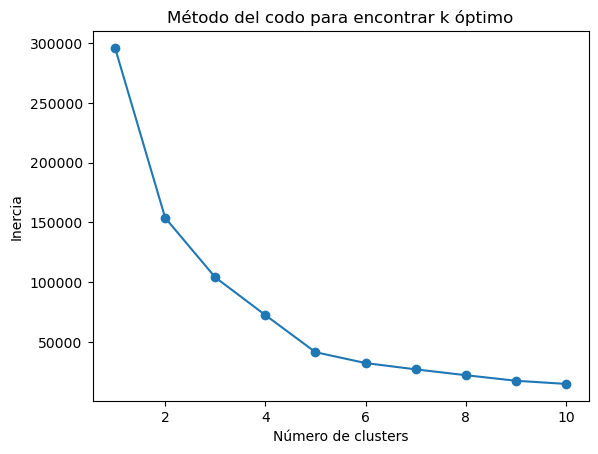

In [15]:
# Definir el número máximo de clusters que se van a probar
max_clusters = 10

# Inicializar una lista vacía para guardar los valores de la inercia
inertia = []

# Probar cada valor de k de 1 hasta max_clusters
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Guardar la inercia en la lista
    inertia.append(kmeans.inertia_)

# Plotear el codo
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar k óptimo')
plt.show()

In [16]:
# Create k-means model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get predicted cluster labels
labels = kmeans.predict(X)

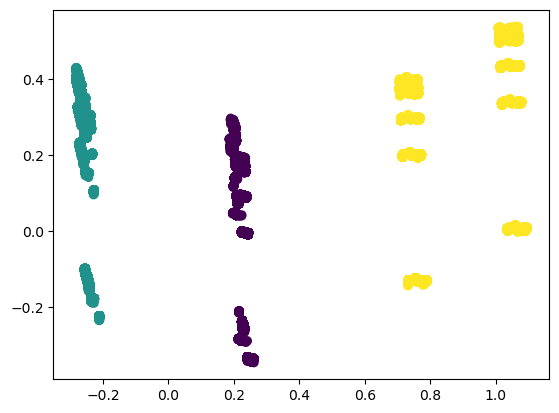

In [21]:

# Aplicar PCA para reducir las características a 2 dimensiones
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

# Dibujar gráfico de dispersión de datos PCA coloreado por etiquetas de cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')

# Mostrar el gráfico
plt.show()


In [24]:
y_counts = y.value_counts()
print(y_counts)


0    242054
2    235897
3    232122
1    226181
Name: price, dtype: int64


### Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predecir las etiquetas de las muestras de prueba
y_pred = logreg.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud:', accuracy)


Exactitud: 0.6338123694933538
